EXPLORATORY DATA ANALYSIS 
 
TITLE: DRIVING FORCES - Key Factors that Impact Car Sales and Pricing.

GOAL: Understand how age, mileage, condition, transmission type, and color influence the price of a vehicle based on the dataset provided.

In [132]:
%pip install pandas 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [136]:

# Reload the DataFrame correctly from the CSV file
df = pd.read_csv("C:/Users/Home-YG716/Downloads/vehicles_us.csv")

# Verify that df is now a DataFrame
print(type(df))  # Should print: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [137]:
# check the first ten records from the data set
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [138]:
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [139]:
# check the data types annd basic information 

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [140]:
df['is_4wd'].fillna(0)

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

check missing values

In [141]:
display(df.isna().sum)


<bound method DataFrame.sum of        price  model_year  model  condition  cylinders   fuel  odometer  \
0      False       False  False      False      False  False     False   
1      False        True  False      False      False  False     False   
2      False       False  False      False      False  False     False   
3      False       False  False      False      False  False      True   
4      False       False  False      False      False  False     False   
...      ...         ...    ...        ...        ...    ...       ...   
51520  False       False  False      False      False  False     False   
51521  False       False  False      False      False  False     False   
51522  False       False  False      False      False  False     False   
51523  False       False  False      False      False  False     False   
51524  False       False  False      False      False  False      True   

       transmission   type  paint_color  is_4wd  date_posted  days_listed  
0   

In [ ]:
print("Hello World")

In [142]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


3 things we can learn from this data above:
Price Distribution: The average vehicle price is $12,132, with a high standard deviation ($10,041), indicating a wide range of prices. While the majority of prices are below $37,500, some outliers reach as high as $375,000, which could represent luxury or rare models.

Vehicle Age and Usage: The average model year is approximately 2009.75, suggesting the dataset includes relatively older vehicles, with odometer readings averaging 115,553 miles. This highlights that many vehicles are significantly used.

Days Listed: Vehicles are listed for an average of 39.55 days, with some listed for as long as 271 days, indicating a range in demand or pricing strategy. Most vehicles tend to sell within 53 days (75th percentile).

ANALYSIS OF PRICE VARIABLE. 

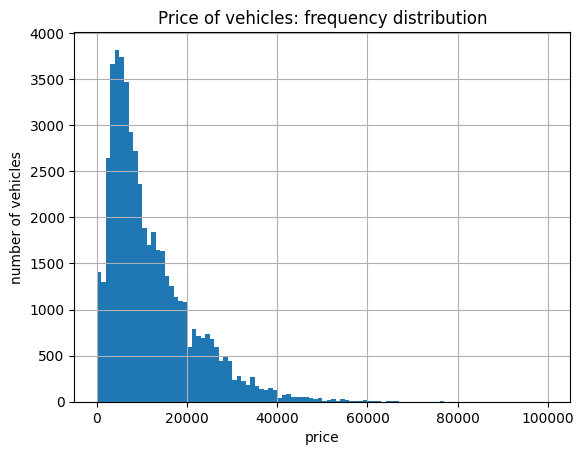

In [143]:
df.hist('price', bins=100, range=(0,100000))
plt.title('Price of vehicles: frequency distribution')
plt.xlabel('price')
plt.ylabel('number of vehicles');

From the above graph, we can learn that majority of vehicles are concentrated in the lower price ranges below $20,000.  
The distribution is right-skewed (positive skewness)

In [144]:
df['model'].value_counts().head(10)

model
ford f-150                    2796
chevrolet silverado 1500      2171
ram 1500                      1750
chevrolet silverado           1271
jeep wrangler                 1119
ram 2500                      1091
toyota camry                   990
honda accord                   964
chevrolet silverado 2500hd     915
gmc sierra 1500                906
Name: count, dtype: int64

 DISTRIBUTION OF MOST FREQUENT CAR MOMDELS.

In [145]:
# Count the frequency of each model
model_counts = df['model'].value_counts()

# Display the top 10 models
print(model_counts.head(10))


model
ford f-150                    2796
chevrolet silverado 1500      2171
ram 1500                      1750
chevrolet silverado           1271
jeep wrangler                 1119
ram 2500                      1091
toyota camry                   990
honda accord                   964
chevrolet silverado 2500hd     915
gmc sierra 1500                906
Name: count, dtype: int64


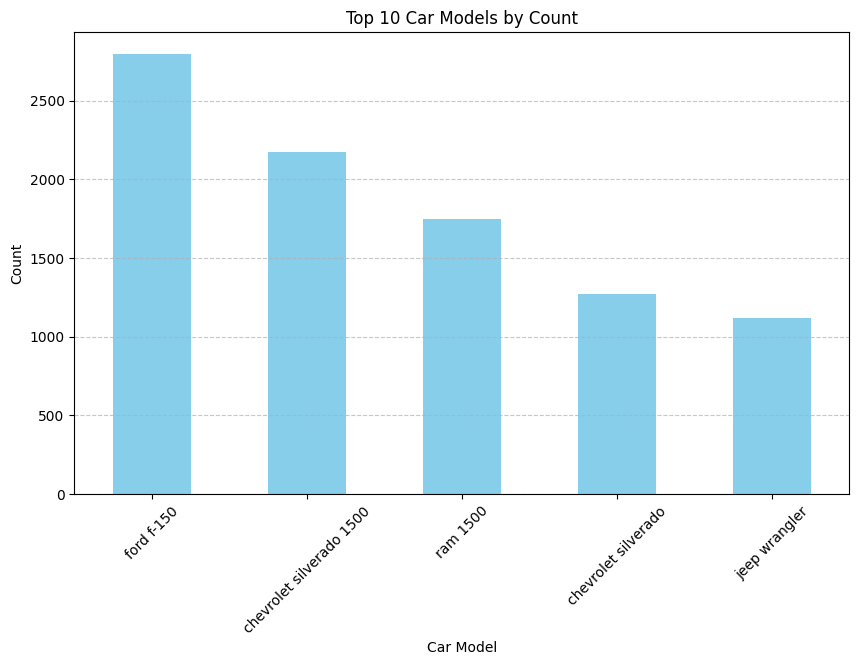

In [146]:
# Bar plot of top 5 models 
import matplotlib.pyplot as plt

# Top 10 models
top_models = model_counts.head(5)

# Plot
plt.figure(figsize=(10, 6))
top_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Models by Count')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [147]:
# Filter for top 5 models
top_5_models = model_counts.head(5).index
filtered_df = df[df['model'].isin(top_5_models)]


# Filter for top 5 models
price_summary = filtered_df.groupby('model')['price'].describe()
print(price_summary)


                           count          mean           std  min     25%  \
model                                                                       
chevrolet silverado       1271.0  14223.326515   9996.149874  1.0  6500.0   
chevrolet silverado 1500  2171.0  15629.868263   9457.607116  1.0  8499.0   
ford f-150                2796.0  14105.922747  12502.771873  1.0  5995.0   
jeep wrangler             1119.0  15009.577301   8591.805226  1.0  9500.0   
ram 1500                  1750.0  14327.429143   8557.899043  1.0  6995.0   

                              50%      75%       max  
model                                                 
chevrolet silverado       11995.0  19500.0   60000.0  
chevrolet silverado 1500  13995.0  21000.0  120000.0  
ford f-150                12294.0  19900.0  189000.0  
jeep wrangler             13980.0  19850.0   55000.0  
ram 1500                  14000.0  20000.0   51500.0  


From the above, we learn that Ford F-150 is the most popular model, with 2,796 listings, followed by the Chevrolet Silverado 1500 with 2,171 listings.
The median prices (50th percentile) for the listed models are relatively close, ranging between $11,995 (Chevrolet Silverado) and $14,980 (Jeep Wrangler). This suggests these vehicles generally fall into a similar mid-range price bracket.


ODOMETER

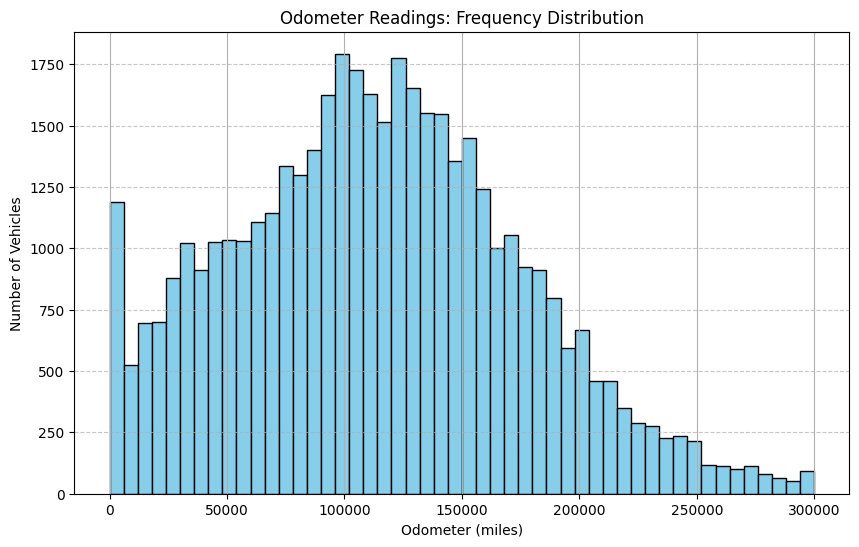

In [148]:

# Plot histogram for odometer readings
plt.figure(figsize=(10, 6))
df['odometer'].hist(bins=50, range=(0, 300000), color='skyblue', edgecolor='black')  # Adjust range and bins as needed
plt.title('Odometer Readings: Frequency Distribution')
plt.xlabel('Odometer (miles)')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most vehicles are clustered in odometer ranges 75,000 to 150,000 miles, indicating a higher supply of moderately used vehicles. 
Vehicles with exceptionally high mileage of more than 300,000 mmiles are less frequent, reflecting their lower demand or diminished market value.

PAINT COLOR

In [149]:
df['paint_color'].fillna('unkown')

0        unkown
1         white
2           red
3        unkown
4         black
          ...  
51520     black
51521     white
51522      blue
51523     black
51524    unkown
Name: paint_color, Length: 51525, dtype: object

In [150]:
df['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

Neutral colors like white (10,029 vehicles), black (7,692 vehicles), and silver (6,244 vehicles) are associated with higher demand.

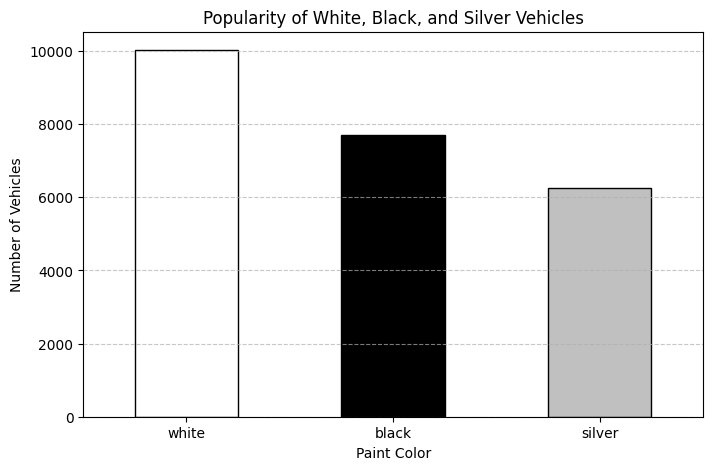

In [151]:


# Filter data for white, black, and silver vehicles
popular_colors = ['white', 'black', 'silver']
color_counts = df['paint_color'].value_counts()
filtered_counts = color_counts[popular_colors]

# Plot histogram
plt.figure(figsize=(8, 5))
filtered_counts.plot(kind='bar', color=['white', 'black', 'silver'], edgecolor='black')
plt.title('Popularity of White, Black, and Silver Vehicles')
plt.xlabel('Paint Color')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


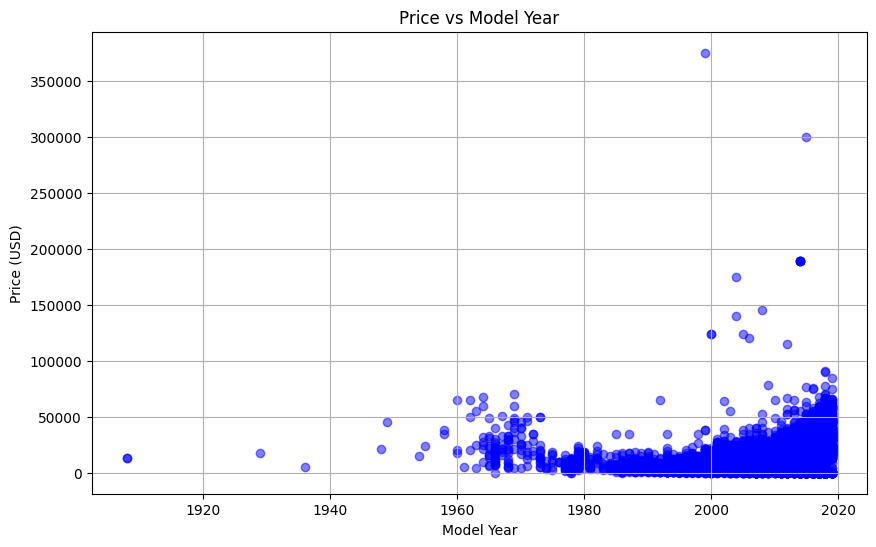

In [152]:

# Plotting the relationship between price and model year
plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['price'], alpha=0.5, color='blue')
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

1. As the model year increases, the price decreases. This is typically a negative correlation.
2. Clusters of high prices among newer cars or popular models that are still in demand.
3. The outliers could be certain older cars with low mileage or in pristine condition hence they might have higher-than-expected prices.

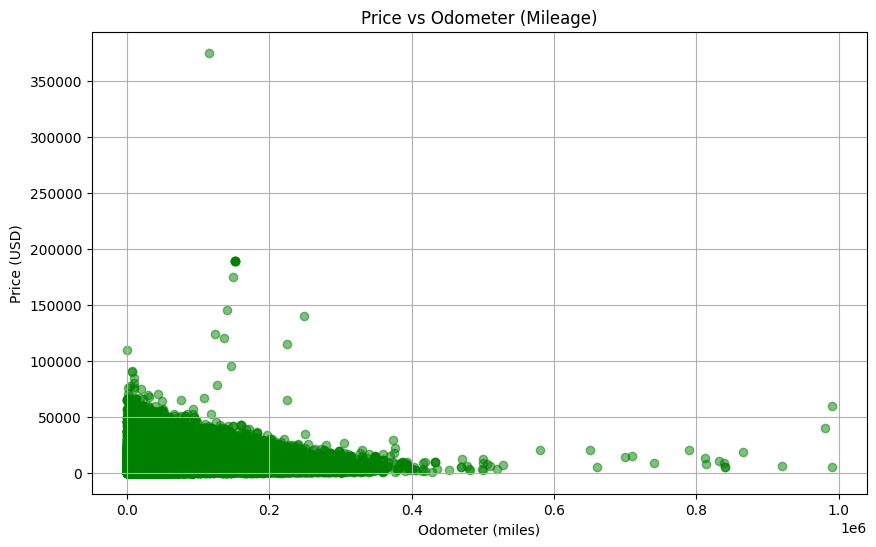

In [153]:

# Plotting the relationship between price and odometer
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5, color='green')
plt.title('Price vs Odometer (Mileage)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

1.  Higher odometer readings are associated with lower prices.
2. Vehicles with similar mileage could show clustered pricing, indicating market norms for specific mileage ranges.

In [157]:
# Assumption regarding model:
# The model year of a vehicle is strongly correlated with its model name.
# Therefore, missing values in the 'model_year' column can be filled using the median
# model year of vehicles with the same model.
# Using median helps reduce the impact of outliers.
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))

# Assumption regarding odometer:
# The odometer reading (mileage) of a vehicle is related to its model year.
# Newer vehicles are expected to have lower mileage on average compared to older vehicles.
# Missing values in the 'odometer' column can be filled using the median odometer reading
# for vehicles with the same model year. Median ensures robustness against outliers.
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))

# Assumption regarding cylinder:
# The number of cylinders in a vehicle is closely related to its model.
# Vehicles of the same model are likely to have the same engine configuration.
# Missing values in the 'cylinders' column can be filled using the median number of
# cylinders for vehicles with the same model. This is based on the assumption that most
# vehicles of a given model have a typical number of cylinders.
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [158]:
print(df.groupby('model')['model_year'].median())

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64


In [159]:
print(df.groupby('model')['odometer'].median())

model
acura tl             140005.0
bmw x5               112000.0
buick enclave        110000.0
cadillac escalade    131565.0
chevrolet camaro      65846.0
                       ...   
toyota sienna        140715.0
toyota tacoma        126865.0
toyota tundra        127128.5
volkswagen jetta     108000.0
volkswagen passat     90000.0
Name: odometer, Length: 100, dtype: float64


In [160]:
print(df.groupby('model')['cylinders'].median())

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64


CONCLUSION:
 Take-home points from the analysis:
1. Price-Model Year Relationship:

As expected, there is a negative correlation between vehicle price and model year. Newer cars tend to be priced higher, while older cars typically see a decrease in value due to depreciation. However, certain models might defy this trend due to brand reputation, condition, or specific demand factors.
2. Mileage (Odometer) and Price:

There is a negative correlation between mileage (odometer) and price. Vehicles with higher mileage generally have lower prices, as higher mileage often implies more wear and tear, and a reduced remaining lifespan. However, some high-mileage vehicles can still maintain high prices due to their make, model, or specific buyer demand (e.g., classic cars).
Popularity of Car Models:

The top models (such as the Ford F-150, Chevrolet Silverado 1500, and Jeep Wrangler) have high frequencies in the dataset, indicating that they are among the most commonly sold vehicles. These models are likely to have a wide appeal and availability in the used car market.
Paint Color Preferences:

3. Neutral colors like white, black, and silver are by far the most popular, suggesting that these colors have broader consumer appeal and higher resale demand. On the other hand, bright or custom colors like yellow, orange, and purple are less common, indicating that they cater to more niche markets or specialized preferences.
Data Distribution and Outliers:

4. The dataset contains several outliers in terms of price, mileage, and model year. These outliers, especially in the case of older cars with low mileage or specific high-demand models, can significantly affect pricing trends. When analyzing vehicle prices, it’s essential to account for these outliers as they can distort general trends.
Final Thoughts:
This EDA has provided useful insights into the relationship between car price, model year, mileage, and other factors. By understanding these relationships, we can make more informed predictions and decisions, whether in terms of car valuation, market trends, or targeted marketing efforts. It is also clear that additional factors like car condition, brand reputation, and regional demand could further influence the price and sales of vehicles in this dataset.